In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sqlite3
import seaborn as sns

In [4]:
df = pd.read_csv('students.csv')
df

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,818044,"Her, Joshua",Male,22,181,79.1,Protestant,2.91,6th,Environmental Sciences,Social Sciences,73.0,71.0,0,1,36750.087135
8236,560166,"Reid, Jose",Male,23,178,72.6,Catholic,2.03,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
8237,380174,"Villa, Raechelle",Female,20,169,67.7,Other,3.72,3rd,Environmental Sciences,Economics and Finance,77.0,75.0,1,0,NaN
8238,540967,"Ngo, Preston",Male,23,195,98.6,Other,2.74,4th,Social Sciences,Political Science,50.0,46.0,1,1,40112.041834


In [5]:
data = df.height

<AxesSubplot:>

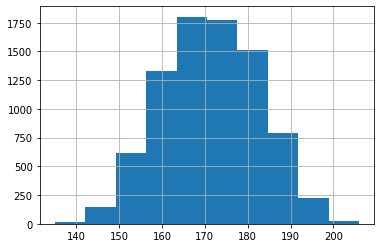

In [7]:
data.hist()

<AxesSubplot:xlabel='height', ylabel='Count'>

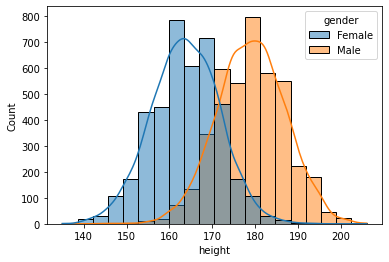

In [9]:
sns.histplot(data = df, x='height', bins=20, hue= 'gender', kde =True)

In [10]:
df.groupby('gender').sum() # группировка по полу, агрегация в виде суммы

,stud.id,age,height,weight,nc.score,score1,score2,online.tutorial,graduated,salary
gender,,,,,,,,,,
Female,2253102813,92914,672615,276913.2,8836.36,146578.0,149858.0,1503,674,2.427644e+07
Male,2269370669,92806,739391,324518.4,9013.28,186885.0,190110.0,1679,1079,5.026482e+07


In [11]:
df.groupby('gender').count()

,stud.id,name,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
gender,,,,,,,,,,,,,,,
Female,4110,4110,4110,4110,4110,4110,4110,4110,4110,4110,2266,2266,4110,4110,674
Male,4129,4129,4129,4129,4129,4129,4129,4129,4129,4129,2626,2626,4129,4129,1079


In [21]:
sql_agg = """
SELECT gender AS gender,
       sum(salary) AS "SUM(salary)",
       AVG(age) AS "Средний(возраст)",
       COUNT(*) AS "COUNT(*)",
       count(salary) AS "COUNT(salary)",
       min(height) AS "MIN(height)",
       max(weight) AS "MAX(weight)",
       count(DISTINCT religion) AS "COUNT_DISTINCT(religion)"
FROM students_table
GROUP BY gender
ORDER BY "SUM(salary)" DESC
"""

In [22]:
connector = sqlite3.connect('class.db')

In [23]:
cursor = connector.cursor()

In [26]:
connector.commit()

In [27]:
records = [
    [1, 'Alice', 23, 23566],
    [2, 'Bob', 34, 34566],
    [3, 'Mike', 56, 5555],
]

In [35]:
for record in records:
    sql = f"""
    INSERT INTO test_table (
        name,
        age,
        salary
    ) VALUES (
        '{record[1]}',
        {record[2]},
        {record[3]}
    )
    """
    cursor.execute(sql)

In [36]:
sql = """
SELECT *
FROM test_table
"""
cursor.execute(sql)

In [38]:
cursor.fetchone()

In [37]:
cursor.fetchall()

[(1, 'Alice', 23, 23566), (2, 'Bob', 34, 34566), (3, 'Mike', 56, 5555)]

In [13]:
#conn.close()

In [40]:
connector.commit()

In [41]:
df.to_sql('students', connector)

8239

In [43]:
sql_agg = """
SELECT gender AS gender,
       sum(salary) AS "SUM(salary)",
       AVG(age) AS "Средний(возраст)",
       COUNT(*) AS "COUNT(*)",
       count(salary) AS "COUNT(salary)",
       min(height) AS "MIN(height)",
       max(weight) AS "MAX(weight)",
       count(DISTINCT religion) AS "COUNT_DISTINCT(religion)"
FROM students
GROUP BY gender
ORDER BY "SUM(salary)" DESC
"""
cursor.execute(sql_agg)

In [44]:
cursor.fetchall()

[('Male', 50264819.84769778, 22.476628723661904, 4129, 1079, 144, 116.0, 5),
 ('Female', 24276443.12678824, 22.606812652068125, 4110, 674, 135, 93.8, 5)]

In [46]:
?df.to_sql

In [47]:
print(sql_agg)


SELECT gender AS gender,
       sum(salary) AS "SUM(salary)",
       AVG(age) AS "Средний(возраст)",
       COUNT(*) AS "COUNT(*)",
       count(salary) AS "COUNT(salary)",
       min(height) AS "MIN(height)",
       max(weight) AS "MAX(weight)",
       count(DISTINCT religion) AS "COUNT_DISTINCT(religion)"
FROM students
GROUP BY gender
ORDER BY "SUM(salary)" DESC



In [49]:
cursor.execute(sql_agg)

In [50]:
for row in cursor:
    print(row)
    

('Male', 50264819.84769778, 22.476628723661904, 4129, 1079, 144, 116.0, 5)
('Female', 24276443.12678824, 22.606812652068125, 4110, 674, 135, 93.8, 5)


In [51]:
df.groupby('gender').count()

,stud.id,name,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
gender,,,,,,,,,,,,,,,
Female,4110,4110,4110,4110,4110,4110,4110,4110,4110,4110,2266,2266,4110,4110,674
Male,4129,4129,4129,4129,4129,4129,4129,4129,4129,4129,2626,2626,4129,4129,1079
